In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
PATH_TO_DATA = "/content/gdrive/MyDrive/data" 
!ls {PATH_TO_DATA}

with_mask  without_mask


In [3]:
import numpy as np 
import pandas as pd 
import os
import cv2

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [5]:
batch_size = 40
img_height = 200
img_width = 200

In [6]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    PATH_TO_DATA,
    validation_split=0.3,
    subset= "training",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 7553 files belonging to 2 classes.
Using 5288 files for training.


In [7]:
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    PATH_TO_DATA,
    validation_split=0.3,
    subset= "validation",
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 7553 files belonging to 2 classes.
Using 2265 files for validation.


In [8]:
class_names = training_data.class_names

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
model = tf.keras.models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation= 'softmax')
])

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
ret = model.fit(training_data, validation_data= testing_data, epochs = 20)

Epoch 1/20
133/133 [==============================] - 1662s 13s/step - loss: 0.6266 - accuracy: 0.6242 - val_loss: 0.5331 - val_accuracy: 0.7320
Epoch 2/20
133/133 [==============================] - 6s 46ms/step - loss: 0.5301 - accuracy: 0.7441 - val_loss: 0.5152 - val_accuracy: 0.7519
Epoch 3/20
133/133 [==============================] - 6s 46ms/step - loss: 0.5105 - accuracy: 0.7598 - val_loss: 0.4868 - val_accuracy: 0.7788
Epoch 4/20
133/133 [==============================] - 6s 46ms/step - loss: 0.4859 - accuracy: 0.7733 - val_loss: 0.4341 - val_accuracy: 0.8110
Epoch 5/20
133/133 [==============================] - 6s 47ms/step - loss: 0.4325 - accuracy: 0.8028 - val_loss: 0.3851 - val_accuracy: 0.8490
Epoch 6/20
133/133 [==============================] - 6s 46ms/step - loss: 0.3812 - accuracy: 0.8352 - val_loss: 0.3319 - val_accuracy: 0.8684
Epoch 7/20
133/133 [==============================] - 6s 46ms/step - loss: 0.3372 - accuracy: 0.8597 - val_loss: 0.2882 - val_accuracy: 0.89

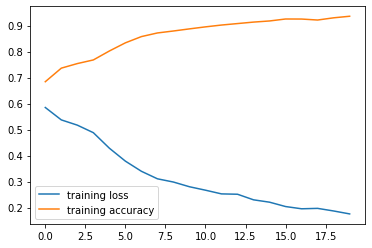

In [15]:
plt.plot(ret.history['loss'], label = 'training loss')
plt.plot(ret.history['accuracy'], label = 'training accuracy')
plt.legend()